In [1]:
### Importing GIS Libraries
import geopandas as gpd
import plotly.graph_objects as go

### Importing data preprocessing & visualization libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importing warning library
import warnings
warnings.filterwarnings("ignore")


from sklearn.cluster import KMeans  #### Sklearn lib for K-Means Clustering


In [2]:
df = pd.read_csv('kings_data_v1.csv')
df.head(2)

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,count_emp_447110,popden_447110,popden_sales_447110,popden_emp_447110,aden_447110,aden_sales_447110,aden_emp_447110,State_Code_y.1,County_Code_y.1,mrFEI
0,0,36,47,57800,1400000US36047057800,36047057800,578.0,CT,172233,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.291667
1,1,36,47,58900,1400000US36047058900,36047058900,589.0,CT,424025,38353,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.333333


In [3]:
df['TRACTCE'] = df['TRACTCE'].apply(lambda x: f'0{x}')

In [4]:
# Assuming df is your DataFrame
columns_to_drop = ['Unnamed: 0', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'AWATER', 'ALAND', 'geometry']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.shape

(754, 318)

In [6]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,count_emp_447110,popden_447110,popden_sales_447110,popden_emp_447110,aden_447110,aden_sales_447110,aden_emp_447110,State_Code_y.1,County_Code_y.1,mrFEI
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.291667
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.333333
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.285714
3,36,47,019900,36047019900,New York,Kings County,1,2929,1476,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.375000
4,36,47,040000,36047040000,New York,Kings County,1,3069,1104,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.214286


In [7]:
### Storing New York Map coordinates of 2019 as a pandas dataframe
ny_map = gpd.read_file(r'cb_2019_36_tract_500k.shp', encoding='utf-8')

In [8]:
### Checking how the dataframe looks like
ny_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
1,36,103,135208,1400000US36103135208,36103135208,1352.08,CT,2287077,0,"POLYGON ((-73.28263 40.83063, -73.28157 40.832..."
2,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
3,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
4,36,055,013204,1400000US36055013204,36055013204,132.04,CT,28207247,93541,"POLYGON ((-77.66835 43.02829, -77.66806 43.029..."


In [9]:
### Checking if all New York Counties are present in the dataframe

print("The total number of counties present in New York is", ny_map['COUNTYFP'].nunique())

print("Showing all county codes")
ny_map["COUNTYFP"].unique()

The total number of counties present in New York is 62
Showing all county codes


array(['071', '103', '047', '055', '005', '029', '061', '119', '033',
       '001', '085', '069', '067', '081', '007', '107', '051', '059',
       '073', '015', '063', '053', '065', '083', '027', '117', '009',
       '057', '037', '093', '021', '087', '121', '111', '105', '043',
       '019', '109', '023', '011', '113', '091', '035', '013', '099',
       '075', '039', '089', '045', '101', '095', '003', '025', '049',
       '097', '115', '017', '031', '077', '079', '123', '041'],
      dtype=object)

In [10]:
## Select "Kings County" which is code - 047 (Brooklyn Borough)

kings_map = ny_map[ny_map["COUNTYFP"]=="047"]

In [11]:
## Checking the column headers of kings dataframe
kings_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
3,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
18,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."
19,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686..."
26,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598..."


In [12]:
kings_map.shape

(761, 10)

In [13]:
df3 = pd.merge(df, kings_map, on='TRACTCE', how='left')

In [14]:
df3.head(3)

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,mrFEI,STATEFP_y,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,0.291667,36,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,0.333333,36,047,1400000US36047058900,36047058900,589,CT,424025.0,38353.0,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,0.285714,36,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."


In [15]:
df3.columns

Index(['STATEFP_x', 'COUNTYFP_x', 'TRACTCE', 'CensusTract', 'State', 'County',
       'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag',
       ...
       'mrFEI', 'STATEFP_y', 'COUNTYFP_y', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object', length=327)

In [16]:
df1 = pd.DataFrame()

In [17]:
df1['TRACTCE'] = df3['TRACTCE']
df1.head(3)

,TRACTCE
0,057800
1,058900
2,037000


In [18]:
#df1['affluence'] = df3['AFFLUENCE16_20']

In [19]:
df1['Disadvantage'] = df3['DISADVANTAGE16_20']
df1.head(3)

,TRACTCE,Disadvantage
0,057800,0.253814667
1,058900,NaN
2,037000,0.21440649


In [20]:
df1['Medfaminc'] = df3['MEDFAMINC16_20']
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc
0,057800,0.253814667,87500
1,058900,NaN,NaN
2,037000,0.21440649,87813


In [21]:
df1['Medfaminc'] = pd.to_numeric(df1['Medfaminc'], errors = 'coerce')
#df1['affluence'] = pd.to_numeric(df1['affluence'], errors = 'coerce')
df1['Disadvantage'] = pd.to_numeric(df1['Disadvantage'], errors = 'coerce')

In [22]:
df1['Medfaminc'] = df1['Medfaminc']/4
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc
0,057800,0.253815,21875.00
1,058900,NaN,NaN
2,037000,0.214406,21953.25


In [23]:
df3['SNAP'] = pd.to_numeric(df3['PPUBAS16_20'], errors='coerce')
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc
0,057800,0.253815,21875.00
1,058900,NaN,NaN
2,037000,0.214406,21953.25


In [24]:
df1['SNAP%'] = df3['SNAP']
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%
0,057800,0.253815,21875.00,0.276615
1,058900,NaN,NaN,NaN
2,037000,0.214406,21953.25,0.178423


In [25]:
df1['PovertyRate'] = df3['PovertyRate']
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,21875.00,0.276615,21.6
1,058900,NaN,NaN,NaN,6.3
2,037000,0.214406,21953.25,0.178423,15.6


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRACTCE       754 non-null    object 
 1   Disadvantage  711 non-null    float64
 2   Medfaminc     698 non-null    float64
 3   SNAP%         711 non-null    float64
 4   PovertyRate   754 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.3+ KB


In [27]:
df1.isna().sum()

TRACTCE          0
Disadvantage    43
Medfaminc       56
SNAP%           43
PovertyRate      0
dtype: int64

In [28]:
df2 = df1.dropna()
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,21875.00,0.276615,21.6
2,037000,0.214406,21953.25,0.178423,15.6
3,019900,0.079001,40312.50,0.049125,12.4
4,040000,0.199686,13187.50,0.223124,13.4
5,098200,0.521628,6239.00,0.475323,46.8


In [29]:
df2.shape

(698, 5)

## **Standardize the Data**

In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler

df_cluster1 = df2.drop(["TRACTCE"], axis=1)

scaler = StandardScaler()
df_cluster1 = scaler.fit_transform(df_cluster1)

In [31]:
df_cluster1[:5]

array([[ 0.24320957,  0.07898062,  0.42411874,  0.1808284 ],
       [-0.06514262,  0.08624039, -0.26970263, -0.32797927],
       [-1.12463231,  1.78954953, -1.18332235, -0.59934337],
       [-0.1803246 , -0.72701626,  0.04614993, -0.51454209],
       [ 2.33873164, -1.3716746 ,  1.82818482,  2.31782064]])

## **Clustering**

## **Method to find number of clusters**

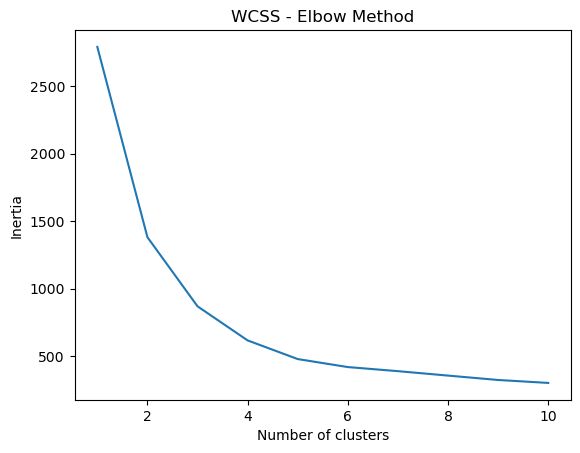

--------------------------------------------------------------------------------
Silhouette Method : 
 
For n_clusters=2, the silhouette score is 0.4267629607306668
For n_clusters=3, the silhouette score is 0.40851691469889184
For n_clusters=4, the silhouette score is 0.3857603586342368
For n_clusters=5, the silhouette score is 0.35173167732151345
For n_clusters=6, the silhouette score is 0.33057199717140096
For n_clusters=7, the silhouette score is 0.2674526269494524
For n_clusters=8, the silhouette score is 0.2695696964868473
For n_clusters=9, the silhouette score is 0.25985931177455196
For n_clusters=10, the silhouette score is 0.262795516673455


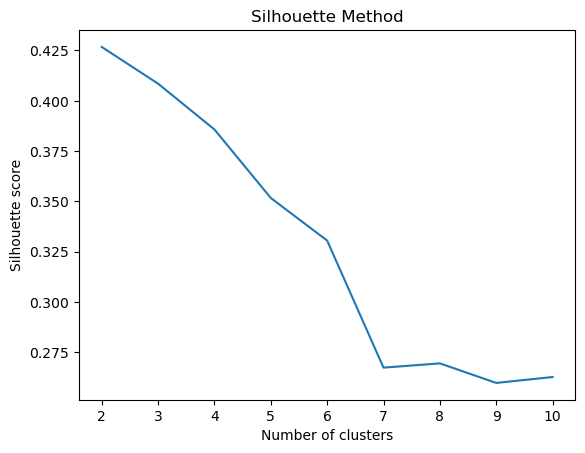

--------------------------------------------------------------------------------


In [32]:
from sklearn.cluster import KMeans
#==========================================================================================================
# 1. WCSS - Elbow method
#==========================================================================================================
wcss = []
range_n_clusters = list(np.arange(1,11))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(df_cluster1)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS - Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

print('-'*80)

#==========================================================================================================
# 2. Silhouette Method
#==========================================================================================================
from sklearn.metrics import silhouette_score

print('Silhouette Method : ')
print(' ')

range_n_clusters = list(np.arange(2,11))

sil_scores = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(df_cluster1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    sil_scores.append(silhouette_avg)

plt.plot(range(2, 11),sil_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

print('-'*80)

In [33]:
df_cluster1[:5]

array([[ 0.24320957,  0.07898062,  0.42411874,  0.1808284 ],
       [-0.06514262,  0.08624039, -0.26970263, -0.32797927],
       [-1.12463231,  1.78954953, -1.18332235, -0.59934337],
       [-0.1803246 , -0.72701626,  0.04614993, -0.51454209],
       [ 2.33873164, -1.3716746 ,  1.82818482,  2.31782064]])

In [34]:
df2.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,21875.00,0.276615,21.6
2,037000,0.214406,21953.25,0.178423,15.6
3,019900,0.079001,40312.50,0.049125,12.4


In [35]:
scaler = StandardScaler()
df2_cluster = scaler.fit_transform(df2)

In [36]:
df2_cluster[:5]

array([[ 0.23684765,  0.24320957,  0.07898062,  0.42411874,  0.1808284 ],
       [-0.40390246, -0.06514262,  0.08624039, -0.26970263, -0.32797927],
       [-0.93067298, -1.12463231,  1.78954953, -1.18332235, -0.59934337],
       [-0.31148658, -0.1803246 , -0.72701626,  0.04614993, -0.51454209],
       [ 1.48138151,  2.33873164, -1.3716746 ,  1.82818482,  2.31782064]])

In [37]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=5, max_iter=500)
kmeans.fit(df2_cluster)
kmeans.labels_

array([0, 4, 1, 4, 2, 0, 3, 4, 0, 2, 3, 1, 3, 1, 4, 0, 1, 3, 4, 3, 1, 3,
       3, 3, 4, 0, 1, 4, 3, 0, 4, 4, 4, 3, 4, 1, 0, 0, 4, 1, 3, 3, 4, 3,
       4, 0, 0, 0, 4, 0, 0, 3, 2, 0, 1, 3, 3, 4, 4, 4, 1, 4, 0, 3, 3, 4,
       3, 3, 3, 0, 3, 4, 2, 4, 3, 3, 4, 0, 0, 1, 2, 0, 3, 4, 3, 4, 0, 3,
       4, 2, 3, 0, 4, 4, 1, 3, 3, 2, 3, 1, 4, 3, 3, 4, 4, 0, 4, 4, 4, 4,
       0, 4, 3, 1, 0, 4, 4, 0, 4, 0, 0, 3, 1, 2, 1, 3, 3, 3, 3, 0, 4, 0,
       0, 4, 2, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 3, 3, 0, 0, 3, 0, 0, 3, 4,
       4, 0, 3, 1, 2, 3, 0, 4, 0, 2, 1, 4, 3, 1, 4, 3, 1, 0, 4, 4, 3, 1,
       0, 3, 1, 0, 2, 3, 2, 4, 0, 2, 0, 3, 0, 2, 3, 3, 3, 3, 4, 3, 4, 4,
       0, 3, 3, 0, 0, 0, 0, 4, 4, 4, 0, 3, 0, 3, 0, 0, 3, 4, 4, 1, 3, 0,
       3, 3, 3, 3, 3, 1, 4, 4, 3, 3, 4, 4, 3, 0, 4, 0, 0, 4, 3, 4, 1, 4,
       0, 0, 0, 0, 4, 0, 3, 1, 3, 4, 3, 1, 4, 4, 3, 4, 4, 4, 4, 3, 2, 3,
       2, 0, 3, 0, 2, 3, 3, 1, 3, 3, 0, 4, 3, 0, 4, 0, 0, 2, 1, 4, 1, 0,
       4, 4, 3, 4, 3, 4, 3, 0, 4, 4, 3, 0, 1, 4, 3,

In [38]:
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,21875.00,0.276615,21.6
2,037000,0.214406,21953.25,0.178423,15.6
3,019900,0.079001,40312.50,0.049125,12.4
4,040000,0.199686,13187.50,0.223124,13.4
5,098200,0.521628,6239.00,0.475323,46.8


In [39]:
# assign the label
df2['TargetLabel'] = kmeans.labels_
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate,TargetLabel
0,057800,0.253815,21875.00,0.276615,21.6,0
2,037000,0.214406,21953.25,0.178423,15.6,4
3,019900,0.079001,40312.50,0.049125,12.4,1
4,040000,0.199686,13187.50,0.223124,13.4,4
5,098200,0.521628,6239.00,0.475323,46.8,2


In [40]:
df2['TargetLabel'].value_counts()

4    194
3    188
0    183
1     82
2     51
Name: TargetLabel, dtype: int64

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 753
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRACTCE       698 non-null    object 
 1   Disadvantage  698 non-null    float64
 2   Medfaminc     698 non-null    float64
 3   SNAP%         698 non-null    float64
 4   PovertyRate   698 non-null    float64
 5   TargetLabel   698 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 35.4+ KB


In [42]:
df3.head(3)

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,STATEFP_y,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,SNAP
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,36,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",0.276615
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,36,047,1400000US36047058900,36047058900,589,CT,424025.0,38353.0,"POLYGON ((-73.94605 40.72926, -73.94419 40.729...",NaN
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,36,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",0.178423


In [43]:
df2.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate,TargetLabel
0,057800,0.253815,21875.00,0.276615,21.6,0
2,037000,0.214406,21953.25,0.178423,15.6,4
3,019900,0.079001,40312.50,0.049125,12.4,1


In [44]:
df2.shape

(698, 6)

## **Merge the Dataframes**

In [45]:
result = pd.merge(df3, df2[['TRACTCE', 'TargetLabel']], on='TRACTCE')
result.head(2)

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,SNAP,TargetLabel
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",0.276615,0
1,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",0.178423,4


In [46]:
result.columns

Index(['STATEFP_x', 'COUNTYFP_x', 'TRACTCE', 'CensusTract', 'State', 'County',
       'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag',
       ...
       'COUNTYFP_y', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'SNAP', 'TargetLabel'],
      dtype='object', length=329)

## **Save Dataset with Labels**

In [47]:
result.to_csv("KingCounty_FoodDeserts_StdzdData_Clusters.csv")

In [48]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(result)

In [49]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 698 entries, 0 to 697
Columns: 329 entries, STATEFP_x to TargetLabel
dtypes: float64(201), geometry(1), int32(1), int64(82), object(44)
memory usage: 1.8+ MB


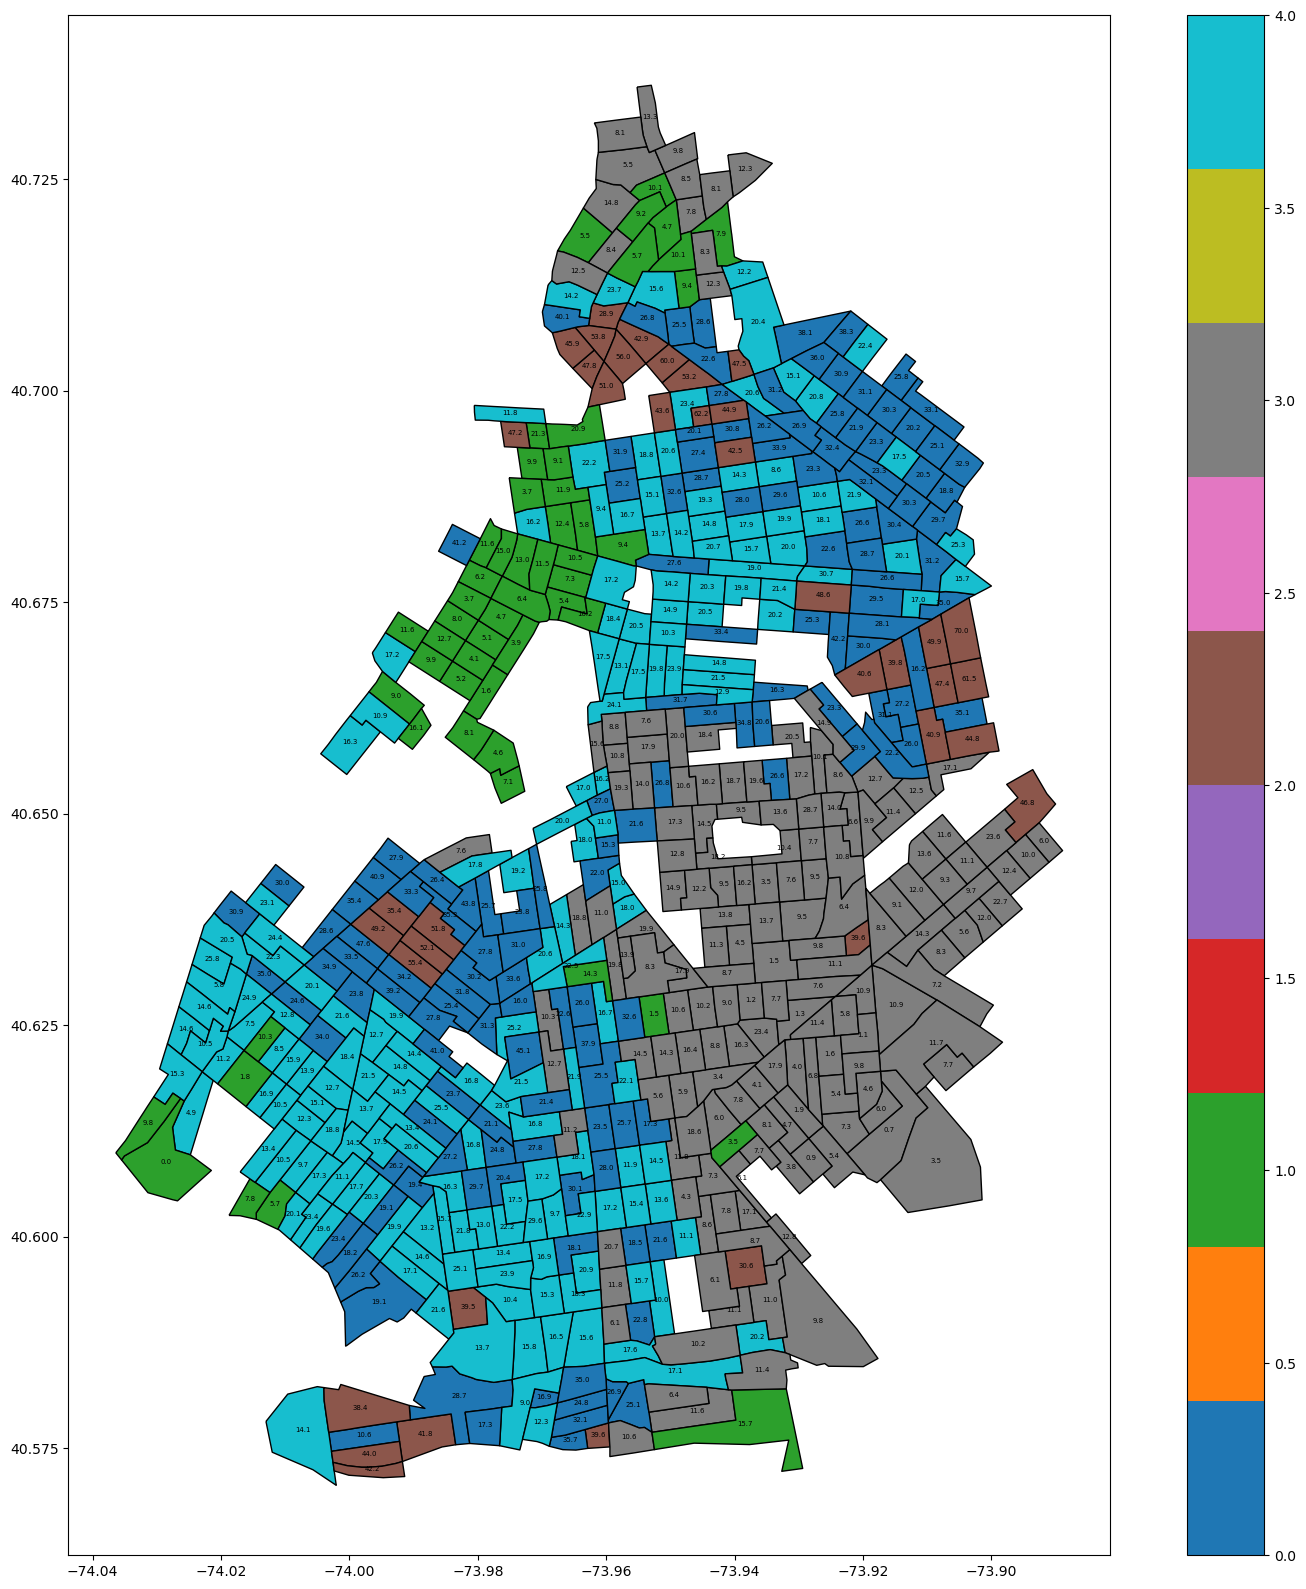

In [50]:
import matplotlib.pyplot as plt

# Assuming 'result' is a GeoDataFrame
fig, ax = plt.subplots(figsize=(20,20))
merged.plot(ax=ax, column='TargetLabel', cmap='tab10', legend=True, edgecolor='black')
ax.set_title('', fontsize=30)

for idx, row in merged.iterrows():
    if row['geometry'] is not None and row['geometry'].is_valid:
        ax.annotate(text=row['PovertyRate'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=5)

# Show the plot
plt.show()
